In [44]:
import numpy as np
import rasterio
from rasterio.plot import show
import glob


<h2>Lookup TIFFs<h2>

In [45]:
tiff_list = glob.glob('data\\ndvi\\*.tif')
print(f"{len(tiff_list)} files found")

11 files found


<h2>Metadata</h2>
<p>Fetched from the first file. Should be uniform for all files.</p>

In [52]:
first = rasterio.open(tiff_list[0])
# print(first.profile)
info = f"""
    Width: {first.width}
    Height: {first.height}
    Datatype: {first.dtypes[0]}
    CRS: {first.crs}
    """
print(info)

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 7200, 'height': 3600, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.05, 0.0, -180.0,
       0.0, -0.05, 90.0), 'tiled': False, 'compress': 'deflate', 'interleave': 'band'}

    Width: 7200
    Height: 3600
    Datatype: int16
    CRS: EPSG:4326
    


<h2>Calculate average</h2>
<p>Each TIFF converted into N-dimensional array (assumed to be the same size), and arithmetic average calculated.</p>

In [47]:
result = np.zeros((first.height, first.width), np.int32)
for tiff_name in tiff_list:
    with rasterio.open(tiff_name) as tiff:
        band = tiff.read(1)
        # print(f"Min.: {np.min(band)}")
        # print(f"Max.: {np.max(band)}")
        print(f"Standard deviation of band: {np.std(band)}")
        result = np.add(result, band)

result = result / len(tiff_list)
print(f"Standard deviation of result: {np.std(result)}")

Standard deviation of band: 2785.364219804941
Standard deviation of band: 2682.789410892293
Standard deviation of band: 2705.591823759587
Standard deviation of band: 2700.9955335451523
Standard deviation of band: 2925.168689314942
Standard deviation of band: 3289.4553325339807
Standard deviation of band: 3578.2574230661294
Standard deviation of band: 3690.336307591952
Standard deviation of band: 3656.837978440178
Standard deviation of band: 3480.316389944918
Standard deviation of band: 3188.310301092234
Standard deviation of result: 3049.6524332715735


<h2>Create output TIFF</h2>


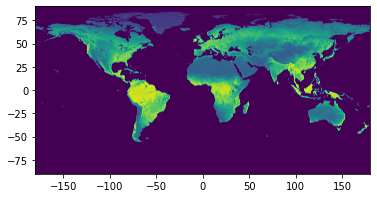

In [56]:
out_tiff = 'data\\out\\ndvi.tif'
with rasterio.Env():
    with rasterio.open(out_tiff, 'w', **first.profile) as dst:
        dst.write(result.astype(rasterio.int16), 1)

with rasterio.open(out_tiff) as ndvi:
    show(ndvi)